##### Dataset

In [2]:
# letterdata.csv
# Location: https://mitu.co.in/dataset

##### Import the libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##### Load the dataset

In [6]:
df = pd.read_csv('letterdata.csv')

In [7]:
df.shape

(20000, 17)

In [8]:
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


##### Separate the input and output variables

In [11]:
x = df.drop('letter', axis = 1 )
y = df['letter']

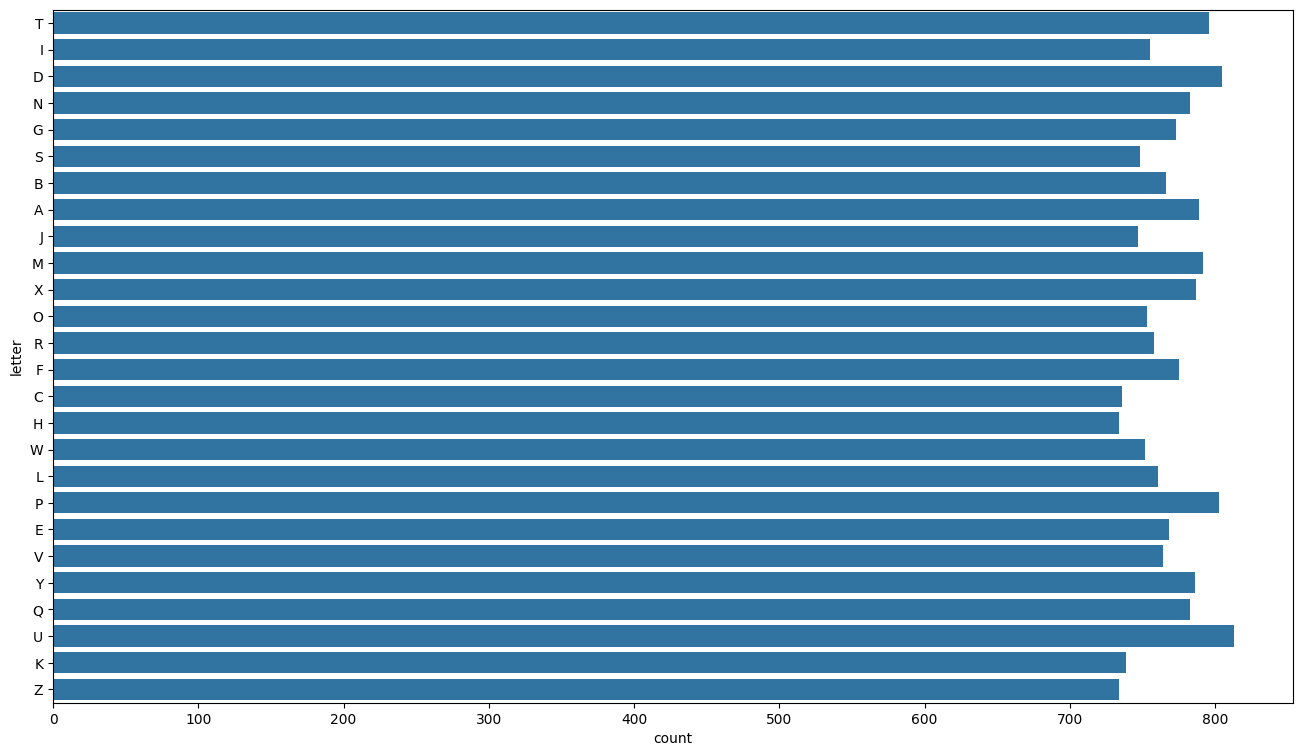

In [13]:
plt.figure(figsize=(16,9))
sns.countplot(y = y);

##### Cross Validation

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, random_state=0, test_size=0.2)

In [17]:
x_train.shape

(16000, 16)

In [18]:
x_test.shape

(4000, 16)

##### Build the model

In [20]:
from sklearn.svm import SVC

In [55]:
svm = SVC(kernel='poly', random_state=0)

In [56]:
svm.fit(x_train, y_train)

SVC(kernel='poly', random_state=0)

##### Evaluate the performance

In [57]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [58]:
y_pred = svm.predict(x_test)

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.99      0.99      0.99       147
           B       0.91      0.92      0.92       158
           C       0.97      0.97      0.97       156
           D       0.91      0.94      0.93       171
           E       0.95      0.95      0.95       145
           F       0.94      0.95      0.95       167
           G       0.92      0.96      0.94       182
           H       0.90      0.89      0.90       123
           I       0.97      0.94      0.96       127
           J       0.98      0.95      0.96       159
           K       0.96      0.94      0.95       143
           L       0.99      0.95      0.97       159
           M       0.99      0.96      0.97       173
           N       0.96      0.99      0.97       134
           O       0.93      0.93      0.93       142
           P       0.97      0.93      0.95       165
           Q       0.99      0.95      0.97       145
           R       0.88    

In [60]:
accuracy_score(y_test, y_pred)

0.95425

In [48]:
# RBF: 0.9335
# Linear: 0.8655
# Poly: 0.95425
# Sigmoid: 0.029

In [61]:
new = pd.DataFrame(
    [[ 6, 9, 9, 7, 6, 5, 6, 3, 5, 10, 9, 9, 8, 5, 2, 7],
    [ 5, 10, 7, 8, 5, 6, 10, 2, 6, 13, 7, 5, 1, 10, 2, 7]], columns=x.columns)

In [62]:
new

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,6,9,9,7,6,5,6,3,5,10,9,9,8,5,2,7
1,5,10,7,8,5,6,10,2,6,13,7,5,1,10,2,7


In [63]:
svm.predict(new)

array(['M', 'F'], dtype=object)